In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [155]:
df = pd.read_csv('vacancies.csv')

In [156]:
df

,id,premium,name,has_test,response_letter_required,area,published_at,salary_from,salary_to,address_raw,employer_name,employer_accredited_it_employer,employer_trusted,schedule_name,professional_roles_name,experience_name,employment_name
0,110240273,False,QA-тестировщик /QA engineer (Middle/Senior),False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-12-03T12:22:49+0300,80000.0,NaN,"Москва, 3-й проезд Перова Поля, 3А",АПТЕКА ВАША № 1,False,True,Полный день,Тестировщик,От 3 до 6 лет,Полная занятость
1,113850442,False,Frontend-разработчик (react),False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-12-17T09:48:30+0300,NaN,NaN,NaN,Кибертех,True,True,Удаленная работа,"Программист, разработчик",От 3 до 6 лет,Полная занятость
2,114053537,False,Специалист (Frontend-разработчик),False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-12-18T15:44:22+0300,NaN,NaN,"Москва, улица Академика Королёва, 12",Первый канал,False,True,Полный день,"Программист, разработчик",От 1 года до 3 лет,Полная занятость
3,114077445,False,Frontend-разработчик,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-12-18T18:07:31+0300,200000.0,NaN,NaN,Brainbox,False,True,Удаленная работа,"Программист, разработчик",От 3 до 6 лет,Полная занятость
4,113854986,False,QA Middle инженер,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-12-17T10:50:35+0300,NaN,NaN,"Москва, 2-я Синичкина улица, 9А",Премиум Бонус,True,True,Полный день,Тестировщик,От 1 года до 3 лет,Полная занятость
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,111773666,False,Ведущий системный аналитик,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-12-09T11:38:35+0300,NaN,NaN,"Москва, Пресненская набережная, 8с1",Capital Group,False,True,Полный день,Другое,Более 6 лет,Полная занятость
17666,107710891,False,React Native developer (+Node.js),False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-12-16T12:57:55+0300,NaN,NaN,"Москва, Вольная улица, 35с2",КОНТРОЛ+,True,True,Полный день,"Программист, разработчик",От 3 до 6 лет,Полная занятость
17667,110606113,False,Senior DevOps Engineer,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-12-16T10:00:59+0300,NaN,NaN,NaN,Colvir Software Solutions,False,True,Полный день,DevOps-инженер,Более 6 лет,Полная занятость
17668,111351714,False,Frontend-разработчик для Программно-Аппаратног...,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-12-16T17:59:32+0300,NaN,NaN,"Москва, улица Кульнева, 3с1",Anima Technologies,False,True,Полный день,"Программист, разработчик",От 3 до 6 лет,Полная занятость


In [157]:
# Удаление дубликатов
df = df.drop_duplicates()

In [158]:
# Преобразование столбца published_at в datetime
df['published_at'] = pd.to_datetime(df['published_at'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_78280\339821957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at'] = pd.to_datetime(df['published_at'])


In [159]:
# Заданный массив профессиональных ролей, которые нужно оставить
roles_to_keep = ['Тестировщик', 'Программист, разработчик', 'Администратор', 
                 'Технический писатель', 'Системный аналитик', 'Руководитель проектов', 
                 'BI-аналитик, аналитик данных', 'Директор по информационным технологиям (CIO)', 
                 'Аналитик', 'Менеджер продукта', 'Системный администратор', 'Бизнес-аналитик'
                 'Руководитель группы разработки', 'Специалист по информационной безопасности', 
                 'Оператор ПК, оператор базы данных', 'Гейм-дизайнер', 'Продуктовый аналитик', 
                 'Руководитель отдела аналитики', 'Сетевой инженер', 'Гейм-дизайнер', 
                 'Руководитель отдела аналитики', 'DevOps-инженер', 'Специалист технической поддержки']

# Фильтрация датафрейма, оставляя только строки, где professional_roles_name находится в roles_to_keep
df = df[df['professional_roles_name'].isin(roles_to_keep)]


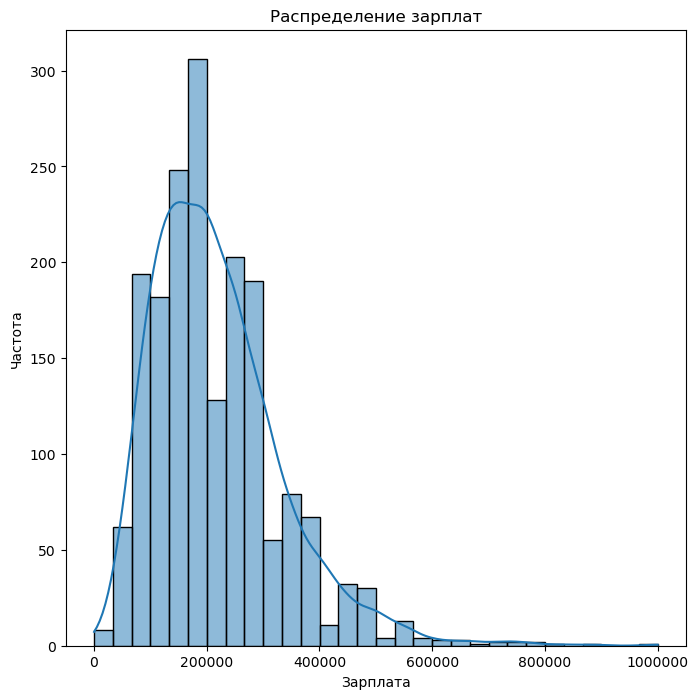

In [160]:
# Анализ распределения зарплат
average_salary = df[['salary_from', 'salary_to']].mean(axis=1).mean()
min_salary = df['salary_from'].min()
max_salary = df['salary_to'].max()

plt.figure(figsize=(8, 8))
sns.histplot(df[['salary_from', 'salary_to']].mean(axis=1), bins=30, kde=True)
plt.ticklabel_format(style='plain')
plt.title('Распределение зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.show()

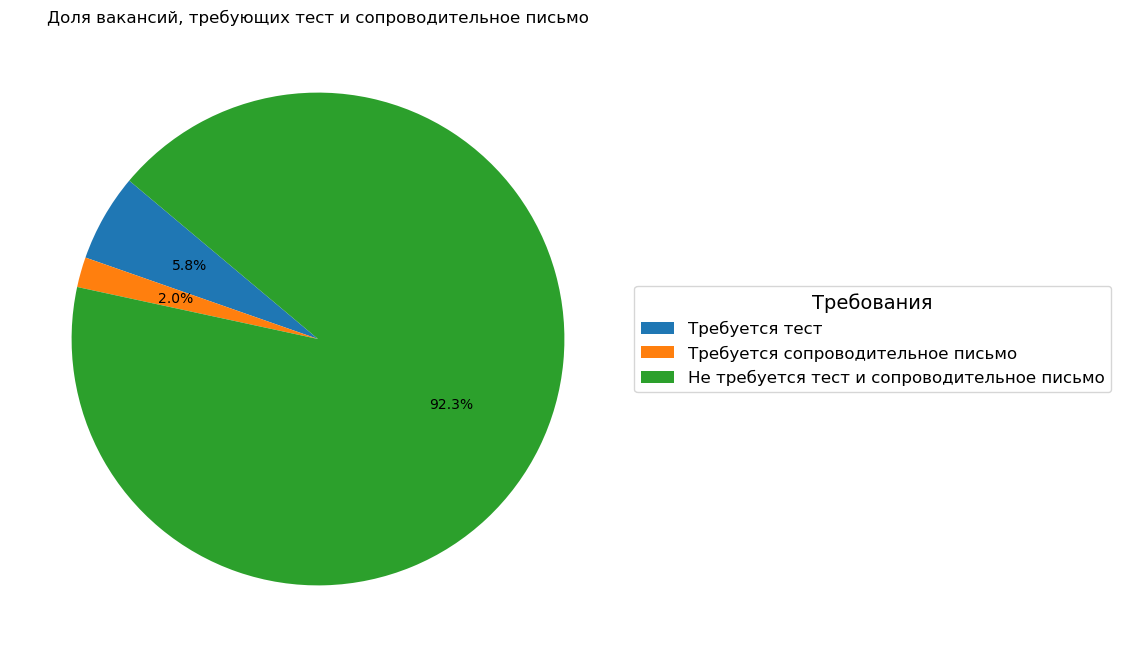

In [182]:

df['has_test'] = df['has_test'].astype(bool)
df['response_letter_required'] = df['response_letter_required'].astype(bool)

test_required_percentage = df['has_test'].mean() * 100
letter_required_percentage = df['response_letter_required'].mean() * 100
neither_required_percentage = ((~df['has_test']) & (~df['response_letter_required'])).mean() * 100

labels = ['Требуется тест', 'Требуется сопроводительное письмо', 'Не требуется тест и сопроводительное письмо']
sizes = [test_required_percentage, letter_required_percentage, neither_required_percentage]

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', startangle=140)
plt.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Требования", fontsize=12, title_fontsize=14)
plt.title('Доля вакансий, требующих тест и сопроводительное письмо')
plt.show()

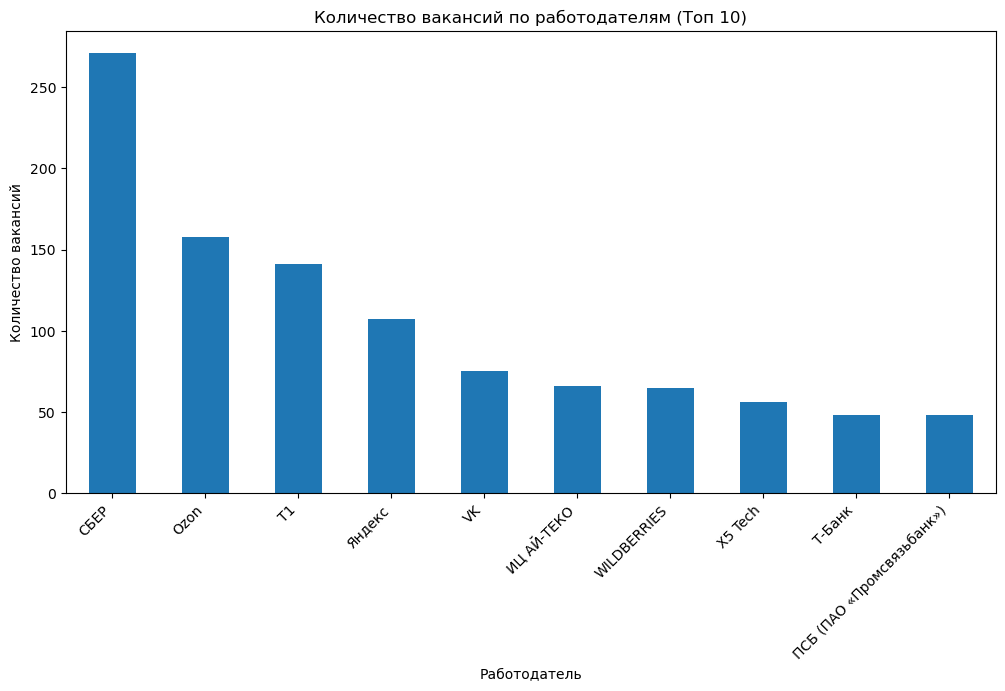

In [185]:
# Анализ работодателей
employer_vacancies = df['employer_name'].value_counts()
accredited_employers_percentage = df['employer_accredited_it_employer'].mean() * 100
trusted_employers_percentage = df['employer_trusted'].mean() * 100

plt.figure(figsize=(12, 6))
ax = employer_vacancies.head(10).plot(kind='bar')
plt.title('Количество вакансий по работодателям (Топ 10)')
plt.xlabel('Работодатель')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')

plt.show()


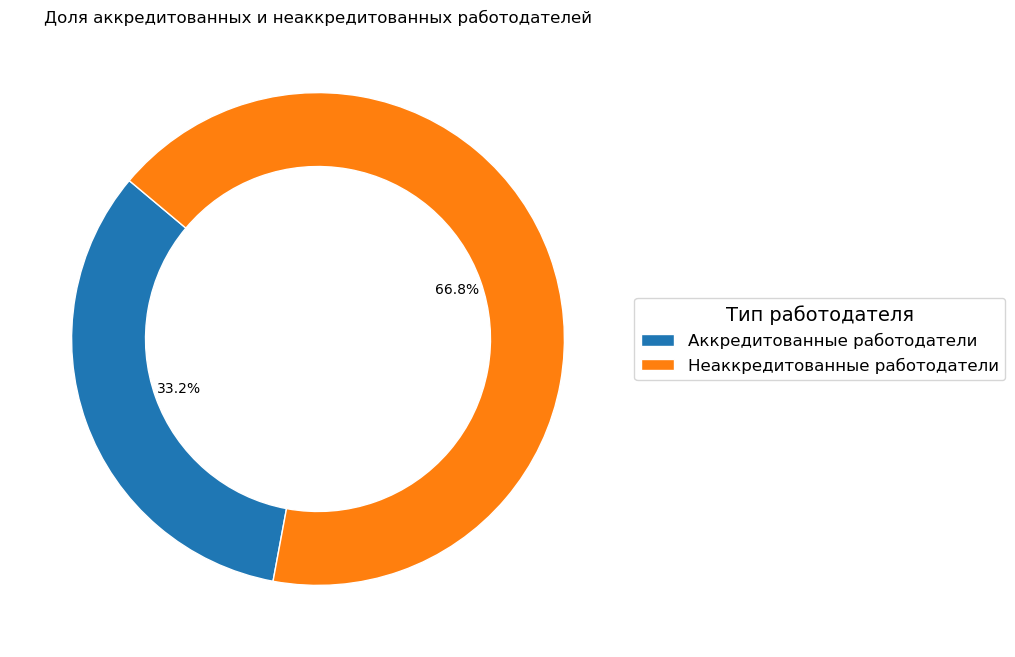

In [192]:
# Акредитованные компании
df['is_accredited'] = df['employer_accredited_it_employer'].astype(bool)

accredited_percentage = df['is_accredited'].mean() * 100
non_accredited_percentage = (~df['is_accredited']).mean() * 100

labels = ['Аккредитованные работодатели', 'Неаккредитованные работодатели']
sizes = [accredited_percentage, non_accredited_percentage]
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Тип работодателя", fontsize=12, title_fontsize=14)
plt.title('Доля аккредитованных и неаккредитованных работодателей')
plt.show()

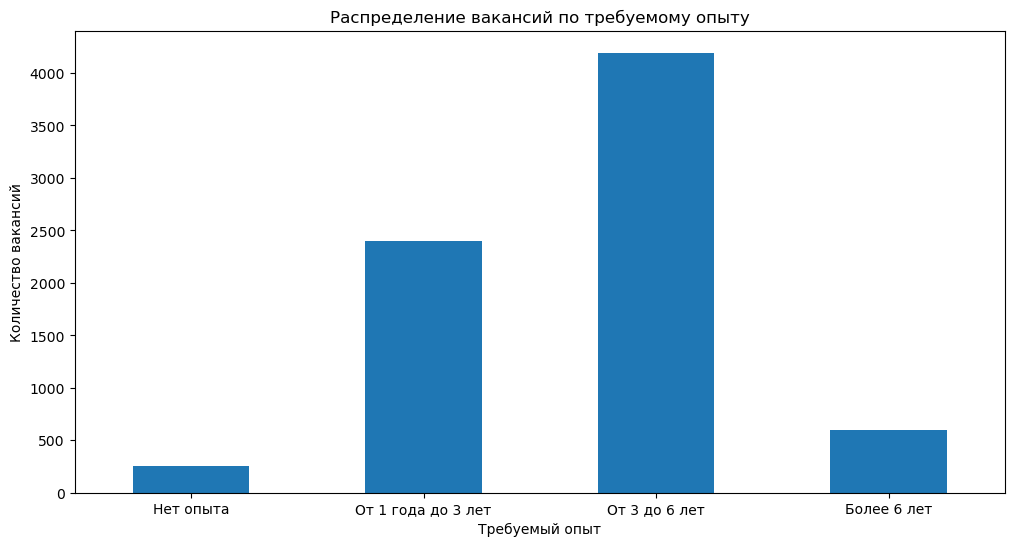

In [163]:

# Анализ распределения вакансий по требуемому опыту
experience_distribution = df['experience_name'].value_counts()

# Заданный порядок для требуемого опыта
experience_order = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']

# Переупорядочивание индексов в соответствии с заданным порядком
experience_distribution = experience_distribution.reindex(experience_order)

# График распределения вакансий по требуемому опыту
plt.figure(figsize=(12, 6))
experience_distribution.plot(kind='bar')
plt.title('Распределение вакансий по требуемому опыту')
plt.xlabel('Требуемый опыт')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=0)
plt.show()



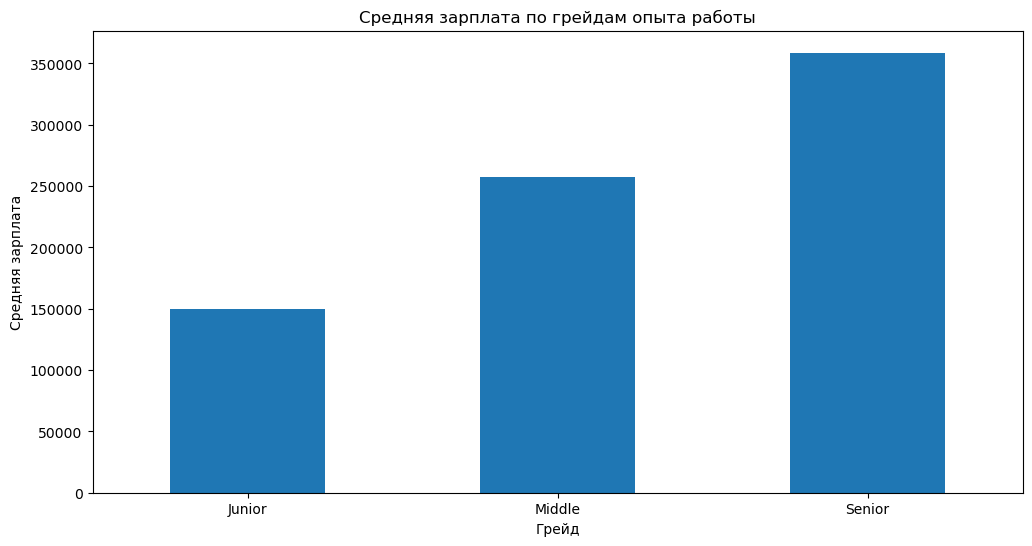

In [175]:
# Определение грейдов опыта работы
experience_grades = {
    'Junior': ['Нет опыта', 'От 1 года до 3 лет'],
    'Middle': ['От 3 до 6 лет'],
    'Senior': ['Более 6 лет']
}

# Функция для определения грейда опыта
def map_experience_to_grade(experience):
    for grade, experiences in experience_grades.items():
        if experience in experiences:
            return grade
    return 'Неизвестно'


df['experience_grade'] = df['experience_name'].apply(map_experience_to_grade)
df['average_salary'] = df[['salary_from', 'salary_to']].mean(axis=1)
average_salary_by_grade = df.groupby('experience_grade')['average_salary'].mean()
grade_order = ['Junior', 'Middle', 'Senior']
average_salary_by_grade = average_salary_by_grade.reindex(grade_order)


# График уровня зарплат по грейдам
plt.figure(figsize=(12, 6))
average_salary_by_grade.plot(kind='bar')
plt.title('Средняя зарплата по грейдам опыта работы')
plt.xlabel('Грейд')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=0)
plt.show()

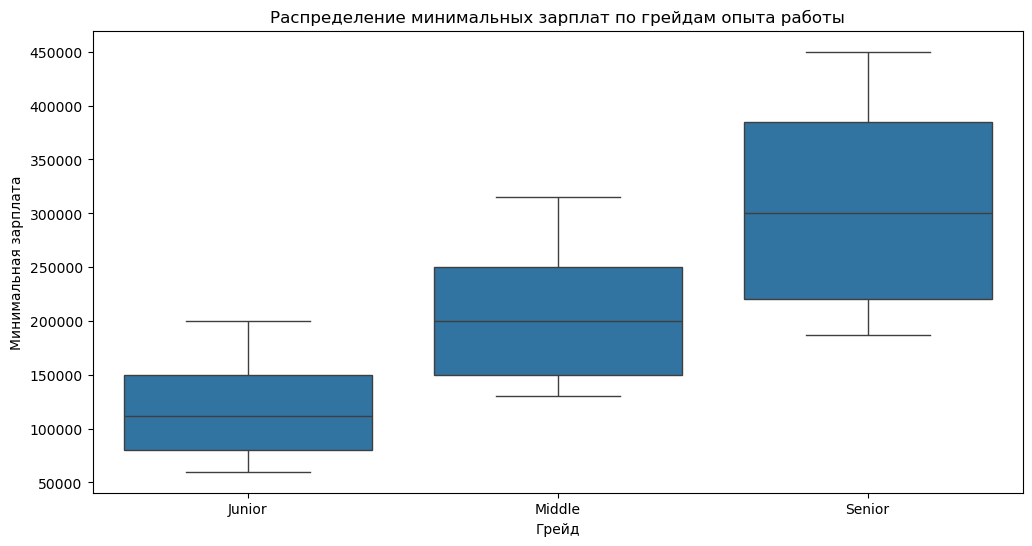

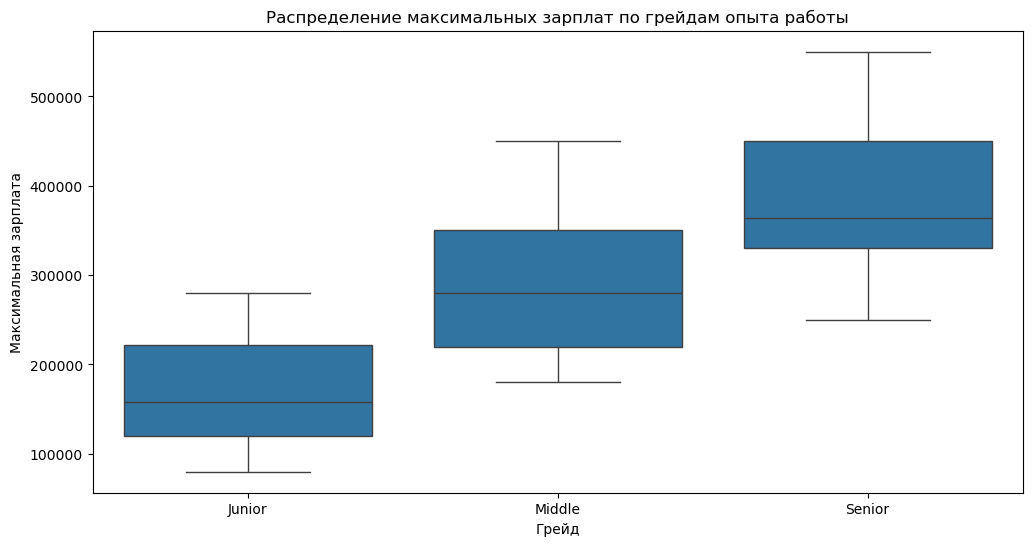

In [177]:
# Боксплот для минимальных зарплат
plt.figure(figsize=(12, 6))
plt.ticklabel_format(style='plain')
sns.boxplot(x='experience_grade', y='salary_from', data=df, order=['Junior', 'Middle', 'Senior'], showfliers=False, whis=[10, 90])
plt.title('Распределение минимальных зарплат по грейдам опыта работы')
plt.xlabel('Грейд')
plt.ylabel('Минимальная зарплата')
plt.show()

# Боксплот для максимальных зарплат
plt.figure(figsize=(12, 6))
plt.ticklabel_format(style='plain')
sns.boxplot(x='experience_grade', y='salary_to', data=df, order=['Junior', 'Middle', 'Senior'], showfliers=False, whis=[10, 90])
plt.title('Распределение максимальных зарплат по грейдам опыта работы')
plt.xlabel('Грейд')
plt.ylabel('Максимальная зарплата')
plt.show()

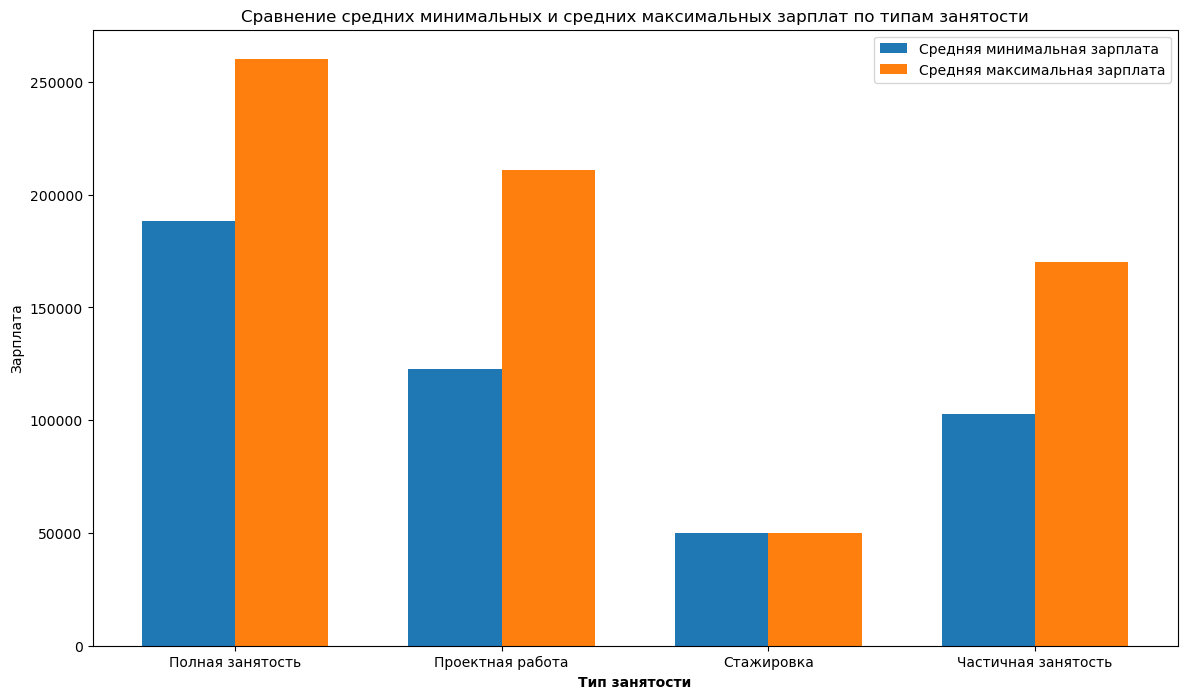

In [166]:
# Анализ зарплат по типам занятости

avg_min_salary_by_employment = df.groupby('employment_name')['salary_from'].mean()
avg_max_salary_by_employment = df.groupby('employment_name')['salary_to'].mean()

bar_width = 0.35
r1 = np.arange(len(avg_min_salary_by_employment))
r2 = [x + bar_width for x in r1]
plt.figure(figsize=(14, 8))
plt.bar(r1, avg_min_salary_by_employment, width=bar_width, label='Средняя минимальная зарплата')
plt.bar(r2, avg_max_salary_by_employment, width=bar_width, label='Средняя максимальная зарплата')
plt.xlabel('Тип занятости', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(avg_min_salary_by_employment))], avg_min_salary_by_employment.index, rotation=0)
plt.ylabel('Зарплата')
plt.title('Сравнение средних минимальных и средних максимальных зарплат по типам занятости')
plt.legend()

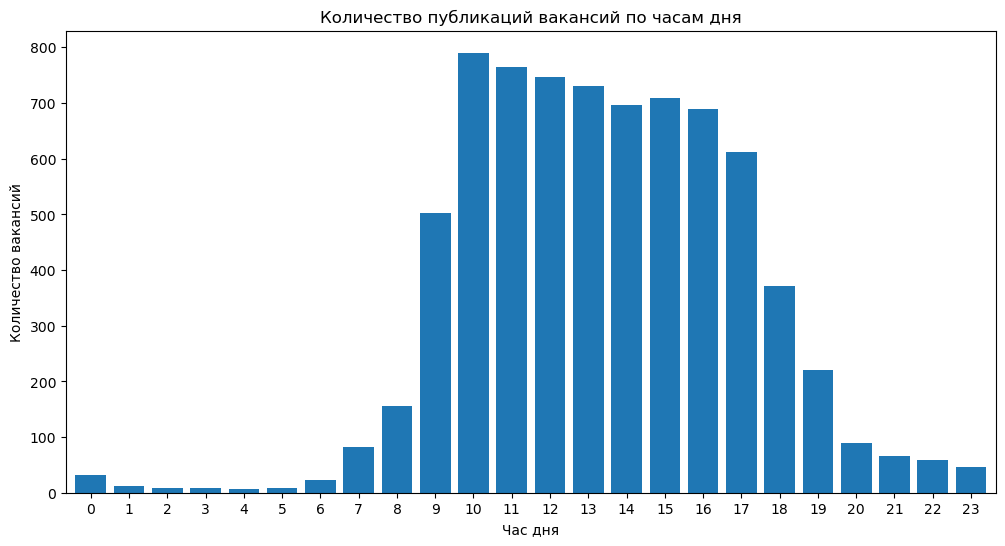

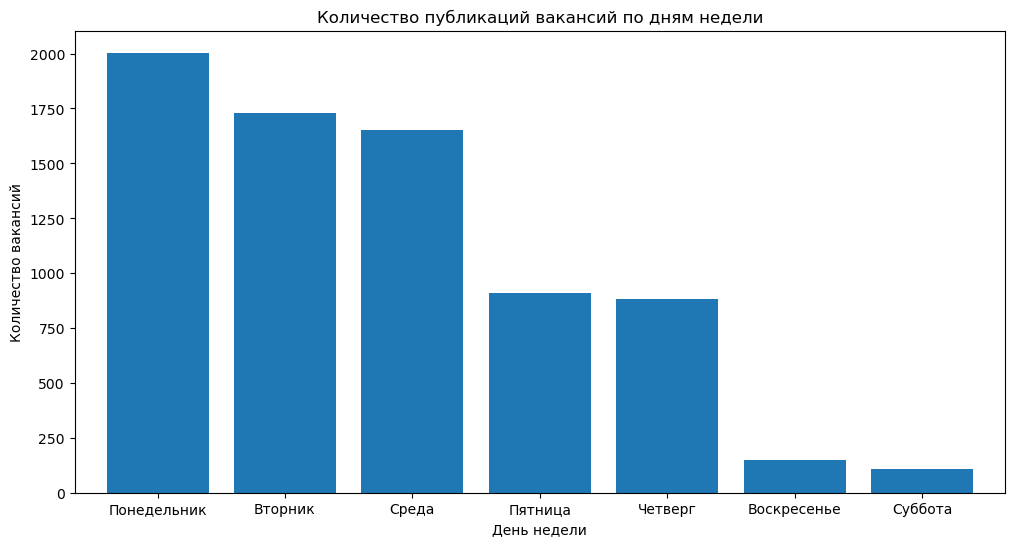

In [167]:
# Извлечение часа и дня недели из published_at
df['hour'] = df['published_at'].dt.hour
df['day_of_week'] = df['published_at'].dt.day_name()

# Преобразование дней недели на русский язык
day_mapping = {
    'Monday': 'Понедельник',
    'Tuesday': 'Вторник',
    'Wednesday': 'Среда',
    'Thursday': 'Четверг',
    'Friday': 'Пятница',
    'Saturday': 'Суббота',
    'Sunday': 'Воскресенье'
}
df['day_of_week_ru'] = df['day_of_week'].map(day_mapping)

# Подсчет количества вакансий, опубликованных в каждый час дня
hourly_counts = df['hour'].value_counts().sort_index()

# Подсчет количества вакансий, опубликованных в каждый день недели
daily_counts = df['day_of_week_ru'].value_counts()

# График зависимости количества публикаций вакансий от часа дня
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', width=0.8)  # Уменьшение зазора между столбцами
plt.title('Количество публикаций вакансий по часам дня')
plt.xlabel('Час дня')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=0)  # Вертикальные подписи на оси X
plt.show()

# График зависимости количества публикаций вакансий от дня недели
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='bar', width=0.8)  # Уменьшение зазора между столбцами
plt.title('Количество публикаций вакансий по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=0)  # Вертикальные подписи на оси X
plt.show()

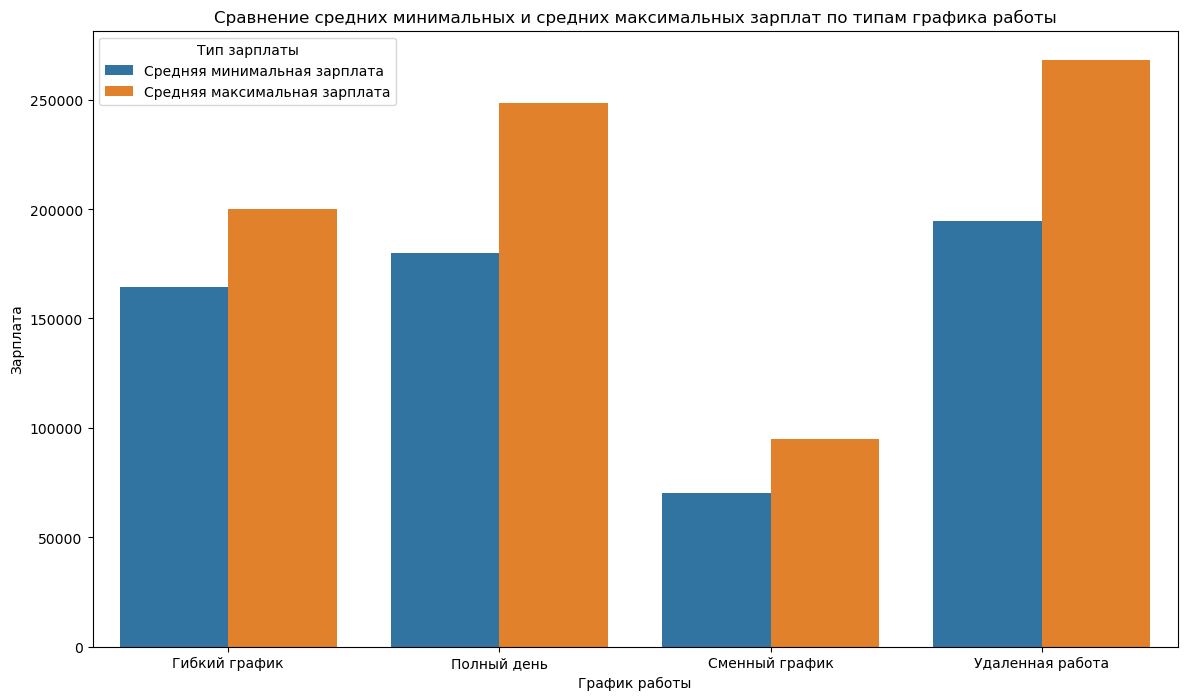

In [171]:
# Расчет средних минимальных и средних максимальных зарплат для каждого типа графика работы
avg_min_salary_by_schedule = df.groupby('schedule_name')['salary_from'].mean()
avg_max_salary_by_schedule = df.groupby('schedule_name')['salary_to'].mean()

# Создание DataFrame для визуализации
salary_data = pd.DataFrame({
    'Schedule': avg_min_salary_by_schedule.index,
    'Средняя минимальная зарплата': avg_min_salary_by_schedule.values,
    'Средняя максимальная зарплата': avg_max_salary_by_schedule.values
})

# Перевод DataFrame в длинный формат для удобства визуализации
salary_data_long = pd.melt(salary_data, id_vars=['Schedule'], value_vars=['Средняя минимальная зарплата', 'Средняя максимальная зарплата'], var_name='Salary Type', value_name='Salary')

# График сравнения средних минимальных и средних максимальных зарплат по типам графика работы
plt.figure(figsize=(14, 8))
sns.barplot(x='Schedule', y='Salary', hue='Salary Type', data=salary_data_long)
plt.title('Сравнение средних минимальных и средних максимальных зарплат по типам графика работы')
plt.xlabel('График работы')
plt.ylabel('Зарплата')
plt.legend(title='Тип зарплаты')
plt.xticks(rotation=0)
plt.show()

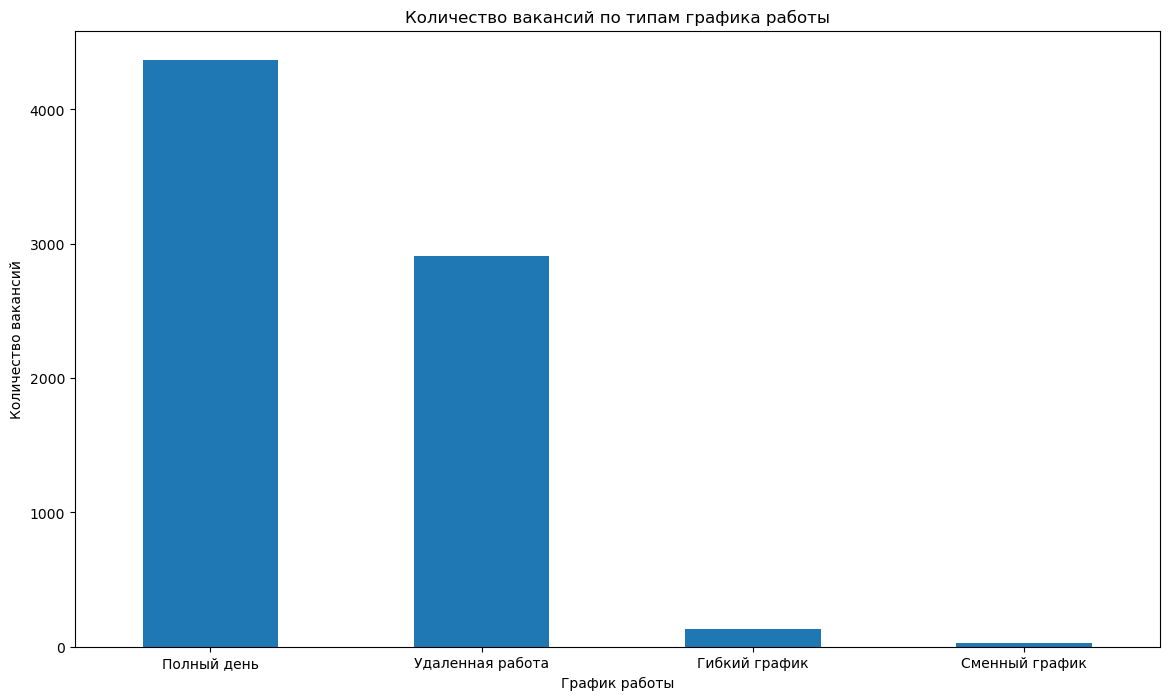

In [172]:
# Подсчет количества вакансий для каждого типа графика работы
vacancies_by_schedule = df['schedule_name'].value_counts()

# График зависимости количества вакансий от графика работы
plt.figure(figsize=(14, 8))
vacancies_by_schedule.plot(kind='bar')
plt.title('Количество вакансий по типам графика работы')
plt.xlabel('График работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=0)
plt.show()

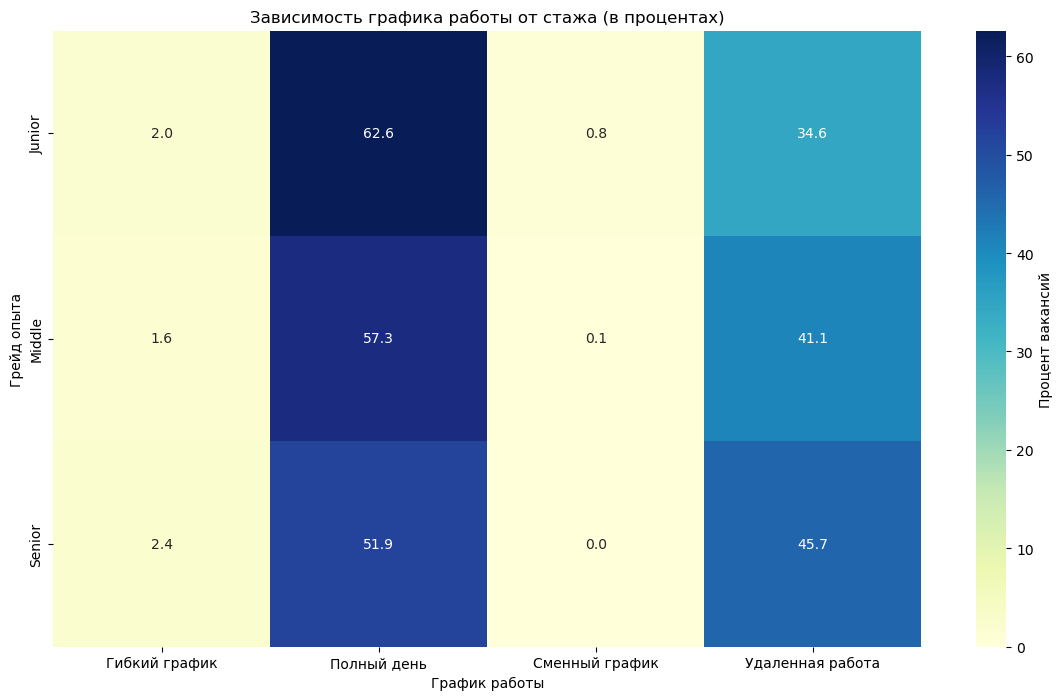

In [170]:
# Подсчет количества вакансий для каждого типа графика работы в зависимости от грейда опыта
schedule_experience_counts = df.groupby(['experience_grade', 'schedule_name']).size().unstack(fill_value=0)

# Подсчет общего количества вакансий для каждого грейда опыта
total_vacancies_by_grade = schedule_experience_counts.sum(axis=1)

# Вычисление процентного распределения
percentage_distribution = schedule_experience_counts.div(total_vacancies_by_grade, axis=0) * 100

# График тепловой карты зависимости графика работы от стажа в процентном эквиваленте
plt.figure(figsize=(14, 8))
sns.heatmap(percentage_distribution, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Процент вакансий'})
plt.title('Зависимость графика работы от стажа (в процентах)')
plt.xlabel('График работы')
plt.ylabel('Грейд опыта')
plt.show()